## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
import matplotlib.pyplot as plt
import math as mt

# Testando Redes Neurais sem os Atributos Categórios

In [2]:
data = pd.read_csv('covtype.csv')

In [3]:
data = data.drop(columns=['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                  'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                  'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                  'Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'])

In [4]:
X = data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]# Passando os atributos usadas para o treino
y = data[['Cover_Type']]# classe para treino


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = True)

In [6]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

'''
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

num_cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])'''

"\nX_train_stand = X_train.copy()\nX_test_stand = X_test.copy()\n\nnum_cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']\nfor i in num_cols:\n    \n    # fit on training data column\n    scale = StandardScaler().fit(X_train_stand[[i]])\n    \n    # transform the training data column\n    X_train_stand[i] = scale.transform(X_train_stand[[i]])\n    \n    # transform the testing data column\n    X_test_stand[i] = scale.transform(X_test_stand[[i]])"

In [7]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (10,), max_iter=300,activation = 'relu', solver = 'adam',verbose=True)

In [8]:
mlp.fit(X_train_std, y_train)

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.93519769
Iteration 2, loss = 0.68580440
Iteration 3, loss = 0.65868688
Iteration 4, loss = 0.65133541
Iteration 5, loss = 0.64731330
Iteration 6, loss = 0.64495721
Iteration 7, loss = 0.64333349
Iteration 8, loss = 0.64227289
Iteration 9, loss = 0.64139719
Iteration 10, loss = 0.64065315
Iteration 11, loss = 0.64012379
Iteration 12, loss = 0.63976140
Iteration 13, loss = 0.63932834
Iteration 14, loss = 0.63897467
Iteration 15, loss = 0.63884739
Iteration 16, loss = 0.63846125
Iteration 17, loss = 0.63828567
Iteration 18, loss = 0.63808369
Iteration 19, loss = 0.63785326
Iteration 20, loss = 0.63773624
Iteration 21, loss = 0.63751455
Iteration 22, loss = 0.63731866
Iteration 23, loss = 0.63705059
Iteration 24, loss = 0.63687069
Iteration 25, loss = 0.63673456
Iteration 26, loss = 0.63654609
Iteration 27, loss = 0.63638433
Iteration 28, loss = 0.63626041
Iteration 29, loss = 0.63609126
Iteration 30, loss = 0.63603330
Iteration 31, loss = 0.63588831
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=1,
              verbose=True)

In [9]:
prediction=mlp.predict(X_test_std)

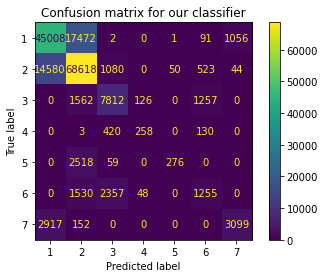

In [10]:
matrix = plot_confusion_matrix(mlp, X_test_std, y_test)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [11]:
print('Accuracy: ',accuracy_score(prediction,y_test))
print('F1-Score: ',f1_score(prediction,y_test,average='macro'))
print('Precision: ',precision_score(prediction,y_test,average='macro'))
print('Recall: ',recall_score(prediction,y_test,average='macro'))

Accuracy:  0.7247452726271342
F1-Score:  0.5240915870488002
Precision:  0.4858488933494826
Recall:  0.6711163281064536


### Treinamento com Otimizador  ADAM (100x)

In [12]:
acc = []
f1 = []
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = True)
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (10,), max_iter=300,activation = 'relu', solver = 'adam',verbose=False)
    mlp.fit(X_train_std, y_train)
    prediction=mlp.predict(X_train_std)
    acc.append(accuracy_score(prediction,y_train))
    f1.append(f1_score(prediction,y_train,average='macro'))
    
acc = pd.Series(acc)
f1 = pd.Series(f1)

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

In [13]:
acc.mean()

0.7321976208975483

In [14]:
acc.std()

0.003094189839866077

In [15]:
f1.mean()

0.5413223885268016

In [16]:
f1.std()

0.017116910397162996

### Treinamento com Otimizador  SGD (100x)

In [17]:
acc2 = []
f12 = []
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = True)
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (10,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
    mlp.fit(X_train_std, y_train)
    prediction=mlp.predict(X_train_std)
    acc2.append(accuracy_score(prediction,y_train))
    f12.append(f1_score(prediction,y_train,average='macro'))
    
acc2 = pd.Series(acc)
f12 = pd.Series(f1)

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

In [18]:
acc2.mean()

0.7321976208975483

In [19]:
acc2.std()

0.003094189839866077

In [22]:
f12.mean()

0.5413223885268016

In [23]:
f12.std()

0.017116910397162996

### Resultados
#### Com ADAM: (tempo =  x)
 Média - Acurácia = 0.73 <br>
 Desvio Padrão - Acurácia = 0.0030 <br>
 Média - F1-Score = 0.54<br>
 Desvio Padrão - F1-Score = 0.017<br>
 #### Com SGD: (tempo <x)
 Média - Acurácia = 0.73 <br>
 Desvio Padrão - Acurácia = 0.0030 <br>
 Média - F1-Score = 0.54<br>
 Desvio Padrão - F1-Score = 0.017<br>

Houve influência da escolha do otimizador no desempenho da rede?<br>
**Houve sim, mas no quesito execução. Pois em questão de valores, os resultados foram bastante semelhantes**

# Estimando o número de neurônios

hidden_layer_sizes -  encontrado no classificador MLP indica o número
de neurônios na camada oculta e para estimar essa quantidade de neurônios foi utilizada a
Regra da Pirâmide Geométrica (Geometric Pyramid Rule) proposta por Masters (1993). Onde,
para uma camada oculta com $n$ entradas e $m$ saídas, a camada oculta terá $\sqrt{n \cdot m}$ neuronios.

$$10 = \alpha \cdot \sqrt{14 \cdot 7},$$ $$\alpha = 1.01015...$$

### For $\alpha = 0.5, N_h = 5 $ ($N_h$ = 4.94...)

In [13]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (5,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)

In [16]:
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)



c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
f1_score(prediction,y_train,average='macro')

0.4583006569253755

In [17]:
accuracy_score(prediction,y_train)

0.7123218623680871

### For $\alpha = 2, N_h = 20 $ ($N_h$ = 19.79898...)

In [19]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (20,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
f1_score(prediction,y_train,average='macro')

0.6057115108575906

In [21]:
accuracy_score(prediction,y_train)

0.7576983978677577

### For $\alpha = 3, N_h = 30 $ ($N_h$ = 29.69848...)

In [22]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (30,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
f1_score(prediction,y_train,average='macro')

0.6281580311366988

In [24]:
accuracy_score(prediction,y_train)

0.7717871298327055

### Resultados 
#### a = 0.5
Acurácia = 0.71<br>
F1-Score = 0.45<br>
#### a = 2
Acurácia = 0.75<br>
F1-Score = 0.60<br>
#### a = 3
Acurácia = 0.77<br>
F1-Score = 0.62<br>


In [31]:
a=0.1
v_a = []
v_p = []
v_f = []
for i in range (0,30):
    nh = a*((14*7)**1/2)
    mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (mt.ceil(nh),), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
    mlp.fit(X_train_std, y_train)
    prediction=mlp.predict(X_train_std)
    v_a.append(a)
    v_p.append(accuracy_score(prediction,y_train))
    v_f.append(f1_score(prediction,y_train,average='macro'))
    a+=0.1

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

c:\programdata\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\programdata

In [32]:
for i in range(1,3):
    top = max(v_f)
    pos = v_a.index(top)
    print('\nTOP ',i,': a = ',v_a[pos],',Accuracy = ',v_p[pos],',F1-Score = ',v_f[pos])
    v_f[pos] = 0
    

ValueError: 0.7125320331600584 is not in list